# Metadata support

In [1]:

import os
import numpy as np
import cupy as cp
from matplotlib import pyplot as plt


Setting resource folder

In [2]:
resources_dir = os.getenv("PYNVIMGCODEC_EXAMPLES_RESOURCES_DIR", "../assets/images/")

Import nvImageCodec module and create Decoder

In [3]:
#os.environ['PYNVIMGCODEC_VERBOSITY'] = '5' uncomment for verbose log output

In [4]:
from nvidia import nvimgcodec
decoder = nvimgcodec.Decoder()

## Geo

In [11]:
img_full_path = os.path.abspath(os.path.join(resources_dir, "Alex_2016-01-14_1300Z_(Geotiff).tif"))
cs = nvimgcodec.CodeStream(img_full_path)
print("Number of images:", cs.num_images)
print("img.width", cs.width)
print("img.height", cs.height)

for code_stream_idx in range(0, cs.num_images):
    scs = cs.getSubCodeStream(code_stream_idx)
    metadata = decoder.getMetadata(scs)
    for m in metadata:
        print(m)
        print(" "*5, m.buffer)

Number of images: 1
img.width 5000
img.height 6400
Metadata(kind=GEO format=JSON buffer_size=276)
      b'{"MODEL_PIXEL_SCALE":[0.00259611,0.0022483,0],"MODEL_TIEPOINT":[0,0,0,-35.489,39.1935,0],"GT_MODEL_TYPE":2,"GT_RASTER_TYPE":1,"GEODETIC_CRS":4326,"GEODETIC_CITATION":"WGS 84","GEOG_ANGULAR_UNITS":9102,"ELLIPSOID_SEMI_MAJOR_AXIS":6.37814e+06,"ELLIPSOID_INV_FLATTENING":298.257}'


Decode image

{'shape': (6400, 5000, 3), 'strides': None, 'typestr': '|u1', 'data': (64424509440, False), 'version': 3, 'stream': 1}


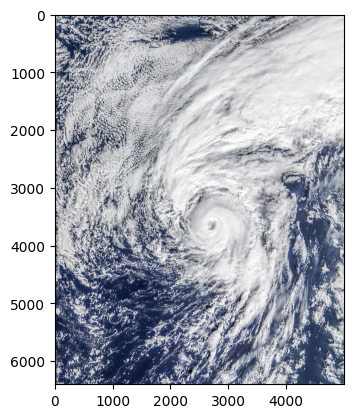

In [6]:
img = decoder.decode(cs)
print(img.__cuda_array_interface__)
plt.figure()
plt.imshow(img.cpu())


## Aperio

Aorta tissue, brightfield, JPEG 2000, YCbCr

In [7]:
img_full_path = os.path.abspath(os.path.join(resources_dir, "JP2K-33003-1.svs"))
cs = nvimgcodec.CodeStream(img_full_path)
print("Number of images:", cs.num_images)
print("img.width", cs.width)
print("img.height", cs.height)

for code_stream_idx in range(0, cs.num_images):
    scs = cs.getSubCodeStream(code_stream_idx)
    metadata = decoder.getMetadata(scs)
    for m in metadata:
        print(m)
        print(" "*5, m.buffer.decode('utf-8'))



Number of images: 6
img.width 15374
img.height 17497
Metadata(kind=MED_APERIO format=RAW buffer_size=530)
      Aperio Image Library v10.0.50
16000x17597 [0,100 15374x17497] (256x256) J2K/YUV16 Q=70|AppMag = 40|StripeWidth = 1000|ScanScope ID = SS1283|Filename = 6797|Title = univ missouri 07.15.09|Date = 07/16/09|Time = 18:15:06|User = 93d70f65-3b32-4072-ba6a-bd6785a781be|MPP = 0.2498|Left = 39.010742|Top = 14.299895|LineCameraSkew = -0.003035|LineAreaXOffset = 0.000000|LineAreaYOffset = 0.000000|Focus Offset = -0.001000|DSR ID = homer|ImageID = 6797|OriginalWidth = 16000|Originalheight = 17597|Filtered = 3|ICC Profile = ScanScope v1
Metadata(kind=MED_APERIO format=RAW buffer_size=498)
      Aperio Image Library v10.0.50
15374x17497 -> 674x768 - |AppMag = 40|StripeWidth = 1000|ScanScope ID = SS1283|Filename = 6797|Title = univ missouri 07.15.09|Date = 07/16/09|Time = 18:15:06|User = 93d70f65-3b32-4072-ba6a-bd6785a781be|MPP = 0.2498|Left = 39.010742|Top = 14.299895|LineCameraSkew = -0.0

Decode all subimages

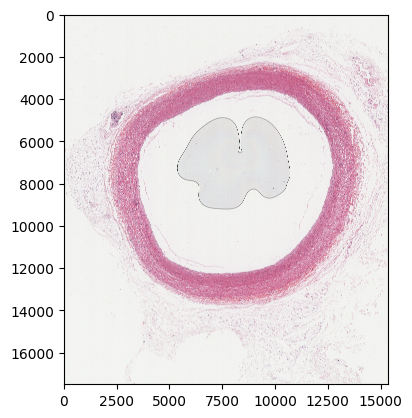

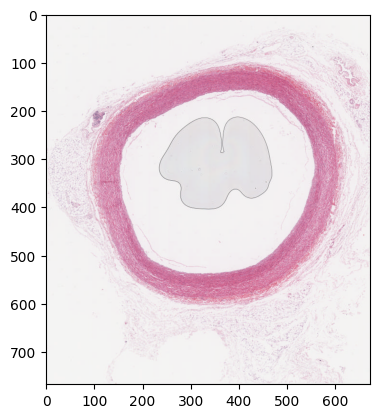

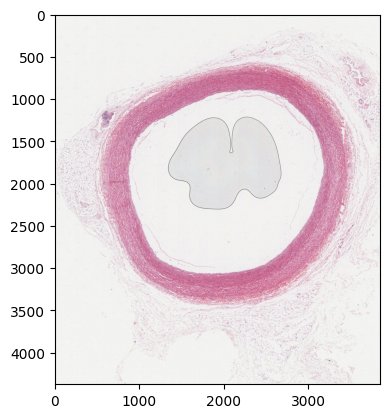

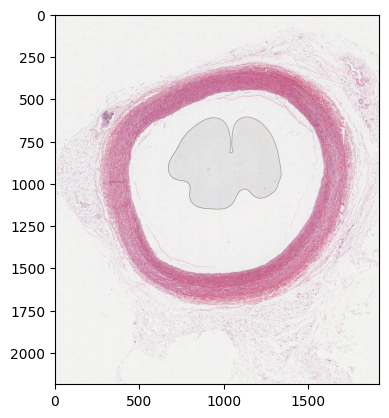

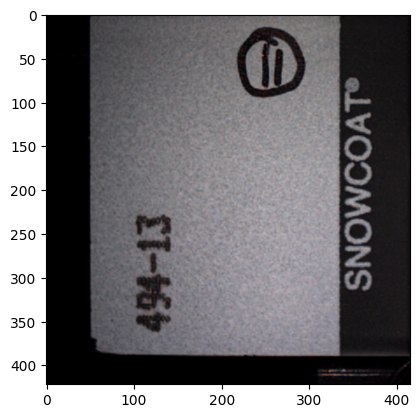

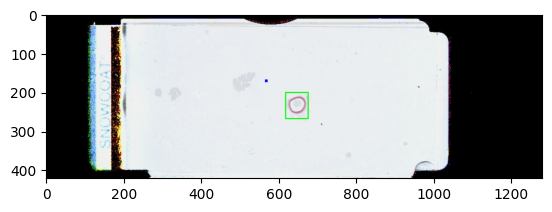

In [8]:
for code_stream_idx in range(0, cs.num_images):
    scs = cs.getSubCodeStream(code_stream_idx)
    img = decoder.decode(scs)
    plt.figure()
    plt.imshow(img.cpu())


## Philips

Lymph node section, H&E stain, brightfield, BigTIFF, barcode attribute, from CAMELYON16 data set

In [9]:
img_full_path = os.path.abspath(os.path.join(resources_dir, "Philips-1.tiff"))
cs = nvimgcodec.CodeStream(img_full_path)
print("Number of images:", cs.num_images)
print("img.width", cs.width)
print("img.height", cs.height)
for code_stream_idx in range(0, cs.num_images):
    scs = cs.getSubCodeStream(code_stream_idx)
    metadata = decoder.getMetadata(scs)
    for m in metadata:
        print(m)
        print(" "*5, m.buffer.decode('utf-8'))

Number of images: 8
img.width 45056
img.height 35840
Metadata(kind=MED_PHILIPS format=XML buffer_size=9335)
      <?xml version="1.0" encoding="UTF-8" ?>
<DataObject ObjectType="DPUfsImport">
	<Attribute Name="DICOM_MANUFACTURER" Group="0x0008" Element="0x0070" PMSVR="IString">Hamamatsu</Attribute>
	<Attribute Name="PIM_DP_SCANNED_IMAGES" Group="0x301D" Element="0x1003" PMSVR="IDataObjectArray">
		<Array>
			<DataObject ObjectType="DPScannedImage">
				<Attribute Name="PIM_DP_IMAGE_TYPE" Group="0x301D" Element="0x1004" PMSVR="IString">WSI</Attribute>
				<Attribute Name="UFS_IMAGE_PIXEL_TRANSFORMATION_METHOD" Group="0x301D" Element="0x2013" PMSVR="IString">0</Attribute>
				<Attribute Name="DICOM_BITS_ALLOCATED" Group="0x0028" Element="0x0100" PMSVR="IUInt16">8</Attribute>
				<Attribute Name="DICOM_BITS_STORED" Group="0x0028" Element="0x0101" PMSVR="IUInt16">8</Attribute>
				<Attribute Name="DICOM_DERIVATION_DESCRIPTION" Group="0x0008" Element="0x2111" PMSVR="IString">tiff-useBigTIFF

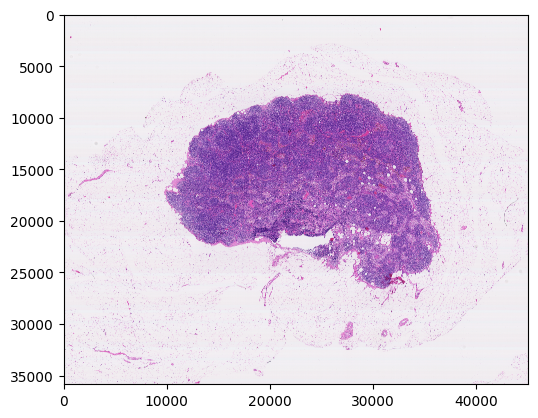

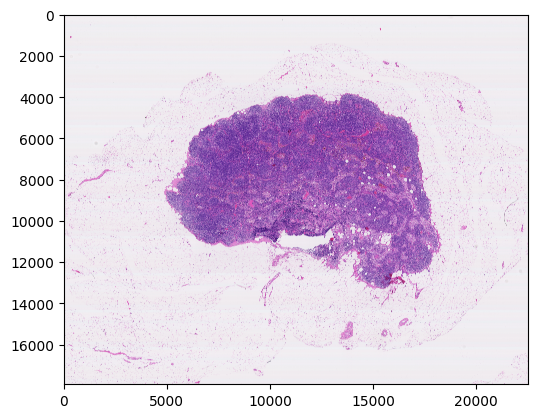

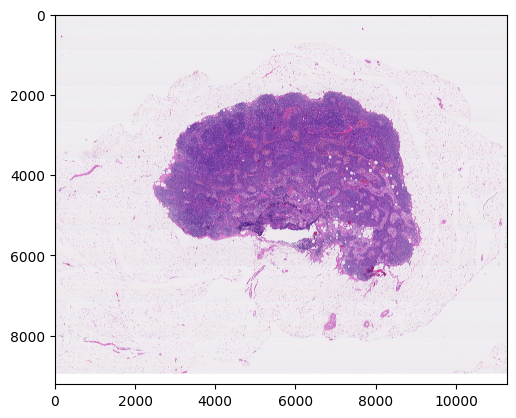

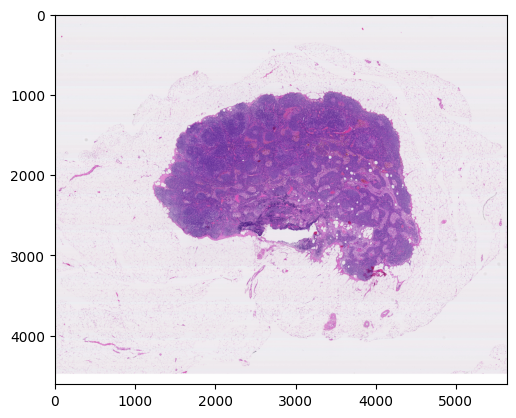

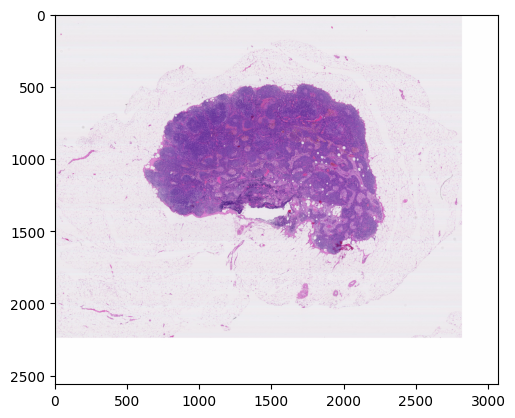

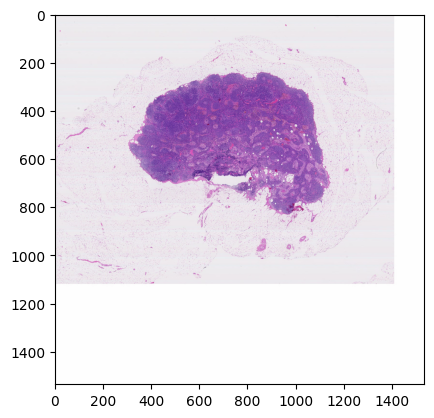

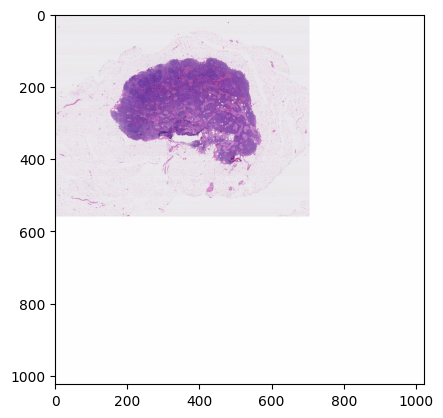

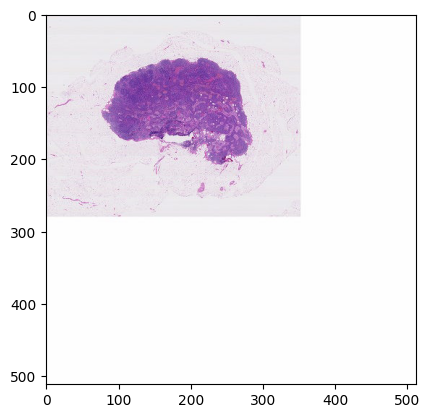

In [10]:
for code_stream_idx in range(0, cs.num_images):
    scs = cs.getSubCodeStream(code_stream_idx)
    img = decoder.decode(scs)
    plt.figure()
    plt.imshow(img.cpu())
